# 🛒 Project Title: Supermarket Sales ETL with PostgreSQL


**Author:** Juan Martín Flores Espinoza  

**Date:** 2025-06-04  

**Description:**  

This notebook walks through the process of loading, transforming, and storing the *Supermarket Sales* dataset into a PostgreSQL database using Python. The goal is to build an end-to-end ETL (Extract, Transform, Load) process using industry-standard tools and practices.  

The project is part of a broader portfolio focused on data engineering and analytics, demonstrating SQL integration, database creation, and Python workflows for real-world data handling.

**Tools Used:**  
- Python (`pandas`, `sqlalchemy`, `dotenv`, `psycopg2`)  
- PostgreSQL  
- Jupyter Notebook / Visual Studio Code / pgAdmin 4  

---

## 📂 Dataset Info

- **Name:** supermarket_sales.csv  
- **Location:** `../data/supermarket_sales.csv`  
- **Source:** [Kaggle - Supermarket Sales Dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)  
- **Observations:** 1000 rows  
- **Fields:** 17 columns including invoice ID, branch, product line, gender, quantity, total, date, time, and rating.

---

## 🎯 Objectives

- 📌 Load a real-world dataset and understand its structure.
- 🧹 Perform minimal data cleaning if needed.
- 🛠️ Set up a PostgreSQL database using `psycopg2` or `sqlalchemy`.
- 🗄️ Create the table schema explicitly using SQL commands.
- 🔄 Insert data into the database using `pandas.to_sql()` or SQL `INSERT` statements.
- 🔍 Validate the data insertion with basic SQL queries.
- 🗂️ Prepare a clean and reproducible notebook following best practices.

---

## 📊 Process Flow

1. **Import Required Libraries**
2. **Load and Preview Dataset**
3. **Connect to PostgreSQL Database**
4. **Create & Load Data into PostgreSQL**
5. **Run Queries to Validate Insertion**
6. **Wrap Up with Insights and Observations**

---

## 🔚 Expected Output

- Database named `marketsales` with one table: `supermarket_sales`
- Full table loaded with 1000 records
- Clean, reproducible and documented Jupyter notebook
- Push to GitHub as part of your public portfolio

**1) Import Requiered Libraries**

In [257]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, text  # For database connections
import sys
import os
import importlib  # Required to reload modules
from dotenv import load_dotenv  # Basic security for sensitive data
import cleaning  # Importing the cleaning module created and host in scripts folder
from pathlib import Path

In [258]:
# --- IMPORT  FUNCTION LOCATED IN SCRIPTS ---

# Get the path of the directory where the notebook is currently being executed (e.g., notebooks/02_supermarket_sales)
current_working_directory = Path.cwd()

# Construct the path to the cleaning.py module
# Go up two directories (../../) to reach 'data-portfolio/'
# Then navigate down to 'scripts/02_supermarket/' to find 'cleaning.py'
module_path = (
    current_working_directory.parent.parent
    / "script"
    / "02_supermarket"
    / "cleaning.py"
)

path_to_module_folder = os.path.dirname(module_path)

if path_to_module_folder not in sys.path:
    sys.path.append(path_to_module_folder)
    print(f"Added to sys.path")

# FORCE module reload to ensure the latest saved version is used
_ = importlib.reload(
    cleaning
)  # CRITICAL in case the cleaning.py file has been edited and the kernel has not reloaded it


 **2) Load and Preview Dataset**

In [259]:
# Get the path of the directory where the notebook is currently being executed (e.g., notebooks/02_supermarket_sales)
current_working_directory = Path.cwd()

# Construct the path to the CSV file
# Go up two directories (../../) to reach 'data-portfolio/'
# Then navigate down to 'data/02_supermarket_sales/supermarket_sales.csv'
data_csv_path = (
    current_working_directory.parent.parent
    / "data"
    / "02_supermarket_sales"
    / "supermarket_sales.csv"
)

# Now you can load the DataFrame
df = pd.read_csv(data_csv_path)


In [260]:
df.head()  # Display the first few rows of the DataFrame

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [261]:
df.info()  # Display information about the DataFrame, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [262]:
df = cleaning.clean_column_names(
    df
)  # Clean the column names using the function from the cleaning module
df.head()  # Display the first few rows of the cleaned DataFrame

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,1/5/2019,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,3/8/2019,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,3/3/2019,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,1/27/2019,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2/8/2019,10:37,Ewallet,604.17,4.76,30.21,5.30


In [263]:
# --- Propperly set formatting to the DataFrame ---
# use pd.set_option to set the display format for floating point numbers
pd.set_option("display.float_format", "{:.2f}".format)

# change the date column to datetime format
df["date"] = pd.to_datetime(df["date"])

# change the time column to datetime format
# df['time'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce')


In [264]:
df.info()  # Display information about the DataFrame after formatting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_id               1000 non-null   object        
 1   branch                   1000 non-null   object        
 2   city                     1000 non-null   object        
 3   customer_type            1000 non-null   object        
 4   gender                   1000 non-null   object        
 5   product_line             1000 non-null   object        
 6   unit_price               1000 non-null   float64       
 7   quantity                 1000 non-null   int64         
 8   tax_5                    1000 non-null   float64       
 9   total                    1000 non-null   float64       
 10  date                     1000 non-null   datetime64[ns]
 11  time                     1000 non-null   object        
 12  payment                  1000 non-n

In [265]:
df.head()  # Display the first few rows of the DataFrame after formatting

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.14,548.97,2019-01-05,13:08,Ewallet,522.83,4.76,26.14,9.10
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.82,80.22,2019-03-08,10:29,Cash,76.40,4.76,3.82,9.60
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.22,340.53,2019-03-03,13:23,Credit card,324.31,4.76,16.22,7.40
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.29,489.05,2019-01-27,20:33,Ewallet,465.76,4.76,23.29,8.40
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.21,634.38,2019-02-08,10:37,Ewallet,604.17,4.76,30.21,5.30


In [266]:
df.describe()  # Get a statistical summary of the DataFrame

,unit_price,quantity,tax_5,total,date,cogs,gross_margin_percentage,gross_income,rating
count,1000.00,1000.00,1000.00,1000.00,1000,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,2019-02-14 00:05:45.600000,307.59,4.76,15.38,6.97
min,10.08,1.00,0.51,10.68,2019-01-01 00:00:00,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,2019-01-24 00:00:00,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,2019-02-13 00:00:00,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,2019-03-08 00:00:00,448.91,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,2019-03-30 00:00:00,993.00,4.76,49.65,10.00
std,26.49,2.92,11.71,245.89,NaN,234.18,0.00,11.71,1.72


In [267]:
df.isnull().sum()  # Check for missing values in each column

invoice_id                 0
branch                     0
city                       0
customer_type              0
gender                     0
product_line               0
unit_price                 0
quantity                   0
tax_5                      0
total                      0
date                       0
time                       0
payment                    0
cogs                       0
gross_margin_percentage    0
gross_income               0
rating                     0
dtype: int64

**3) Connect to PostgreSQL Database**

In [268]:
# Once th database is created in PostgreSQL, you can use the following code to connect to it and create a table:

# Libraries that are needed
# from sqlalchemy import create_engine
# import os
# from dotenv import load_dotenv

load_dotenv()  # securely load environment variables from a .env file

DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(
    f"postgresql+psycopg2://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

**4) Create & Load Data into PostgreSQL**

In [269]:
df.to_sql("supermarket_sales", engine, index=False, if_exists="replace")
# This will create a table named 'supermarket_sales' in the PostgreSQL database adding the data in the dataframe and replace it if it already exists.

1000

**5) Run Queries to Validate Insertion**

In [270]:
# library used to execute raw SQL queries
# from sqlalchemy import text

query = """
SELECT COUNT(*) FROM supermarket_sales;
"""

with engine.connect() as connection:
    result = connection.execute(text(query))

    for row in result:
        print("Total records:", row[0])

Total records: 1000


In [271]:
query_city = """
SELECT city, COUNT(*) AS total_sales 
FROM supermarket_sales 
GROUP BY city 
ORDER BY total_sales DESC;
"""
# This query retrieves the total sales for each city, ordered by the number of sales in descending order.
with engine.connect() as connection:
    result = connection.execute(text(query_city))

    for row in result:
        print(row)

('Yangon', 340)
('Mandalay', 332)
('Naypyitaw', 328)


### 📊 Total Sales by City
This bar chart shows the total sales grouped by each city where the supermarket operates.


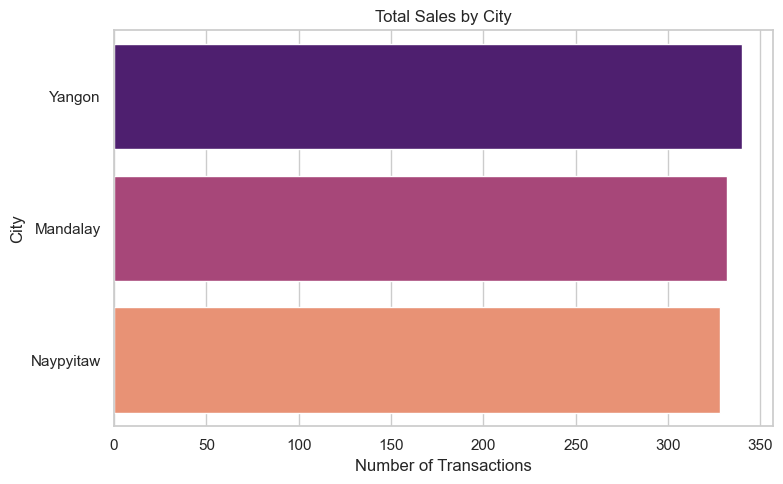

In [272]:
sns.set_palette("magma")

df_city = pd.read_sql(query_city, engine)

plt.figure(figsize=(8, 5))
sns.barplot(
    x="total_sales", y="city", data=df_city, palette="magma", hue="city", legend=False
)
plt.title("Total Sales by City")
plt.xlabel("Number of Transactions")
plt.ylabel("City")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_city.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

Insight:
Yangon has the highest total sales, followed by Naypyitaw and Mandalay, indicating a stronger market performance in that city.

### 📊 Average Income by Gender
This chart displays the average total sales grouped by the gender of the customer.

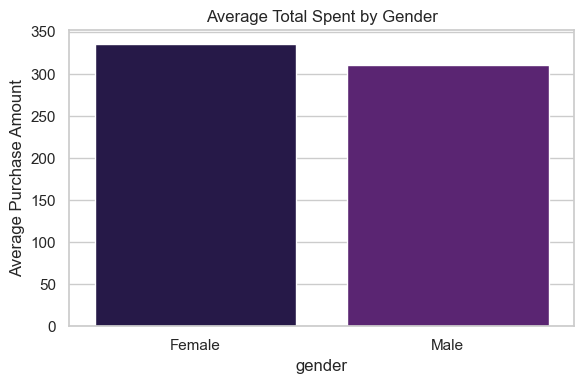

In [273]:
# This query calculates the average total spent

query_gender = """
SELECT gender, AVG(total) AS avg_spent 
FROM supermarket_sales 
GROUP BY gender;
"""

df_gender = pd.read_sql(query_gender, engine)

plt.figure(figsize=(6, 4))
sns.barplot(
    x="gender",
    y="avg_spent",
    data=df_gender,
    hue="gender",
    legend=False,
)
plt.title("Average Total Spent by Gender")
plt.ylabel("Average Purchase Amount")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/avg_spent_gender.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

Insight:
Sales are slightly higher for female customers, which could imply gender-based differences in spending behavior.

### 📊 Sales by Product Line
This visualization shows the total sales aggregated by each product line.

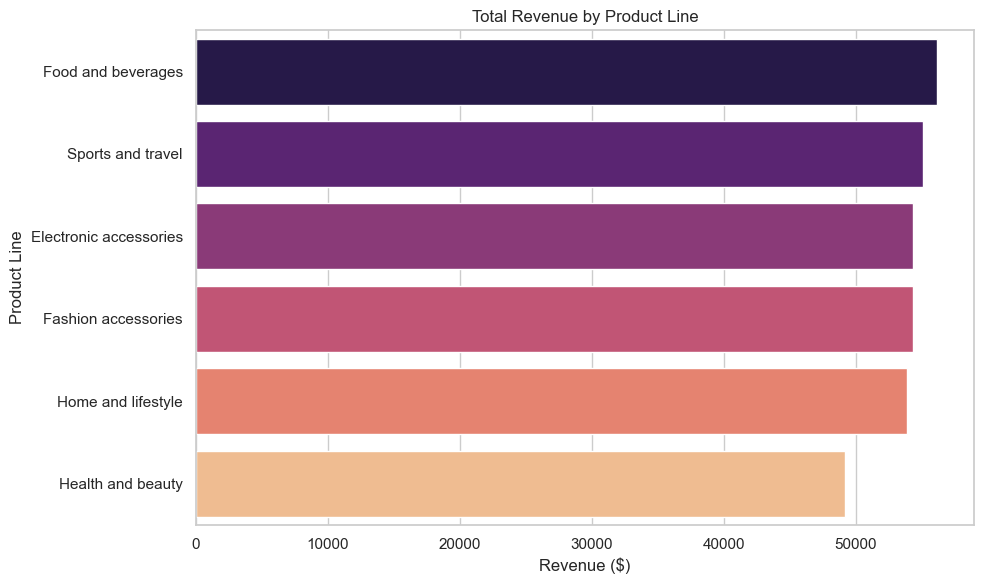

In [274]:
# SQL query to get the total sales by city

query_prod = """ 
SELECT product_line, SUM(total) AS revenue 
FROM supermarket_sales 
GROUP BY product_line 
ORDER BY revenue DESC;
"""

df_prod = pd.read_sql(query_prod, engine)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="revenue",
    y="product_line",
    data=df_prod,
    hue="product_line",
    legend=False,
)
plt.title("Total Revenue by Product Line")
plt.xlabel("Revenue ($)")
plt.ylabel("Product Line")
plt.tight_layout()

plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/revenue_by_product.png",
    dpi=300,  # Set the resolution of the saved figure
    bbox_inches="tight",  # Ensure that the entire figure is saved without clipping
)

plt.show()

Insight:
Food and Beverages and Electronic Accessories are the top-performing product lines in terms of total revenue.

### 📈 Total Sales by Date
This line chart tracks total daily sales over time.


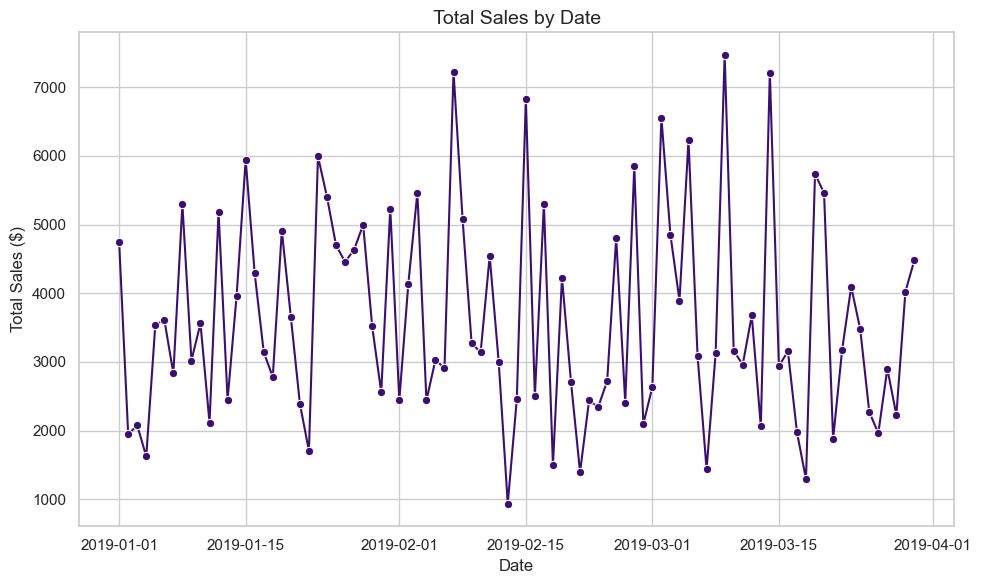

In [275]:
# Query
query_dates = """
SELECT date, SUM(Total) As total_sale
FROM supermarket_sales 
GROUP BY date 
ORDER BY date;
"""

df_date_sales = pd.read_sql(query_dates, engine)

# Set seaborn style
sns.set_style("whitegrid")  # You can also use "darkgrid", "white", etc.

# Generate colors using magma colormap
colors = plt.cm.magma(np.linspace(0.2, 0.8, 1))  # Use a color range from the magma map

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x="date", y="total_sale", data=df_date_sales, marker="o", color=colors[0])

# Labels and title
plt.title("Total Sales by Date", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.tight_layout()

# Save figure
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_date.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()


Insight:
Sales remain relatively stable over time, with occasional peaks—possibly due to promotional days or weekends.

### ⏰ Sales by Hour
This bar chart shows the total sales grouped by each hour of the day, providing insights into peak hours for customer purchases.


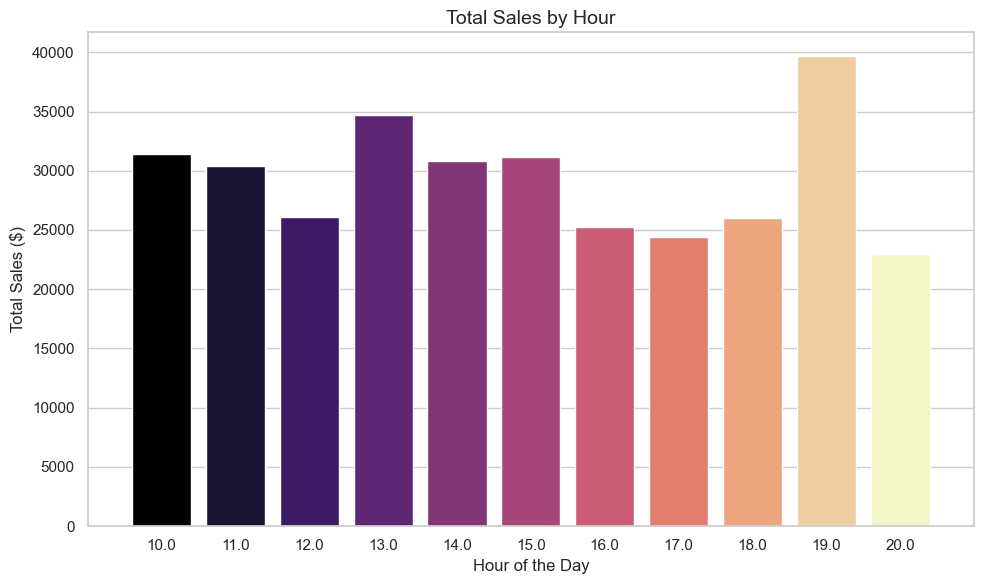

In [276]:
# Query
query_times = """
SELECT 
    EXTRACT(HOUR FROM TO_TIMESTAMP("time", 'HH24:MI')) AS hour,
    SUM("total") AS total_sales
FROM supermarket_sales
GROUP BY hour
ORDER BY hour;
"""

# Execute the query and load the results into a DataFrame
df_hour_sales = pd.read_sql(query_times, engine)

# plotting the total sales by hour
plt.figure(figsize=(10, 6))
sns.barplot(
    x="hour",
    y="total_sales",
    data=df_hour_sales,
    palette="magma",
    hue="hour",
    legend=False,
)

plt.title("Total Sales by Hour", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(range(-1, 12))  #   Set x-ticks to show all hours of the day

plt.tight_layout()
plt.savefig(
    "/Users/jmfe2/VSC/data-portfolio/figures/02_supermarket/total_sales_by_hour.png",
    dpi=300,
    bbox_inches="tight",
)

plt.show()

Insight:
Sales peak at 7 PM, followed by strong performance in late morning and early afternoon. A dip around 4–5 PM suggests lower customer activity during that time.

---

## Conclusions

This notebook demonstrated how to extract, analyze, and visualize sales data from a PostgreSQL database using Python.

Key takeaways include:

- **Geographical Performance:** Yangon had the highest total sales among the three cities, indicating it is the strongest market.
- **Customer Insights:** Slightly higher average spending was observed among female customers.
- **Product Trends:** The top-selling product lines were *Food and Beverages* and *Electronic Accessories*.
- **Sales Over Time:** Sales remained stable with some fluctuations, and certain days showed noticeable spikes.
- **Peak Hours:** Sales peak at 7 PM, followed by strong performance in late morning and early afternoon. A dip around 4–5 PM suggests lower customer activity during that time. 

This analysis provides a foundation for further exploration, such as forecasting sales trends, analyzing customer behavior in-depth, or optimizing product placement and promotions.

---



## Technical Conclusions

- This notebook demonstrated the full workflow to load data from a CSV file into a PostgreSQL database using `SQLAlchemy` and `pandas.to_sql()`.
- Database connection was managed securely using environment variables with `dotenv`.
- The database structure was defined manually via pgAdmin, which aligns with best practices for production-level database schema control.
- Data insertion was verified using SQL queries executed from Python through the `engine.connect()` method.

---

### Potential Next Steps

- Perform SQL queries directly from Python to practice `SELECT`, `GROUP BY`, `JOIN`, etc.
- Build dashboards using Power BI or Tableau by connecting to this PostgreSQL database.
- Apply more advanced ETL (Extract, Transform, Load) procedures in future versions.



